Data understanding

In [10]:
import pandas as pd  #Data understanding & cleaning - More like Excel 

In [11]:
import numpy as np  #Matrix Related operations 

In [12]:
import seaborn as sns


In [13]:
cd desktop

[WinError 2] The system cannot find the file specified: 'desktop'
m:\DS\Python Practiced Files


In [14]:
HeartD = pd.read_csv('M:\DS\excel files\clevelanda.csv')
#Dataframe variable can be named anything 

In [15]:
HeartD.shape

(303, 14)

In [16]:
HeartD.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Heart Disease Classification - Based on below parameters we need to make a statement whether a person going to get heart disease or not. Client provided with 4 Values (1,2,3,4) Presence of HD and 0 Abse of HD. 
#cp-- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic(Discrete) 
#trestbps - resting blood pressure(Continuous)
#Chol - Continuous Data
#fbs - Sugar Level - discrete data
#restecg - 3 types (discrete data)
#Thalach - Maximum heart rate achieved - Continuous
#exang: exercise induced angina (1 = yes; 0 = no) 
#slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 
#thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
#ca: number of major vessels (0-3) colored by flourosopy

In [17]:
HeartD.info() 

#We are able to notice object data type for ca and thal columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [18]:
#From above chart we see 2 columns datatype is object , lets change dt to int ot float

HeartD['ca'].value_counts() 


#We are able to notice 4 '?' values in ca column, What to do?

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [19]:
HeartD['thal'].value_counts() 

#We are able to notice 2 '?' values in thal column, What to do?

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [20]:
HeartD['class'].value_counts() 
#we see more patience with heatdisease 


0    164
1     55
2     36
3     35
4     13
Name: class, dtype: int64

<AxesSubplot: ylabel='count'>

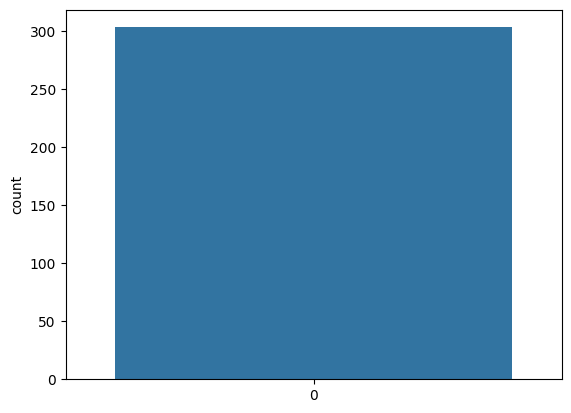

In [21]:
#lets get pictorial represntation using seaborn
import seaborn as sns
sns.countplot(HeartD['class'])
#Highest value in class data is 0 , which represnts no hear disease.

<AxesSubplot: >

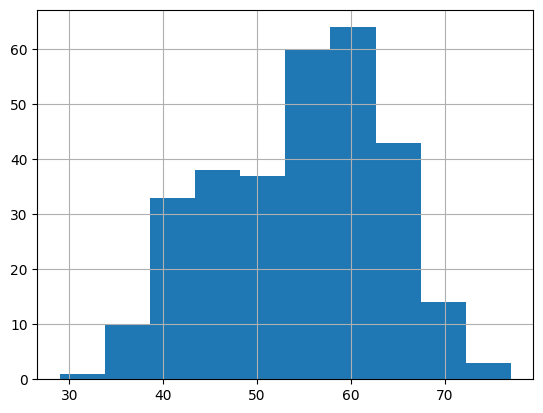

In [22]:
HeartD['age'].hist()
#pictorial representation
#which age people have high risk of heart disease

C:\Users\mouna\AppData\Local\Temp\ipykernel_16744\1275025436.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HeartD['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

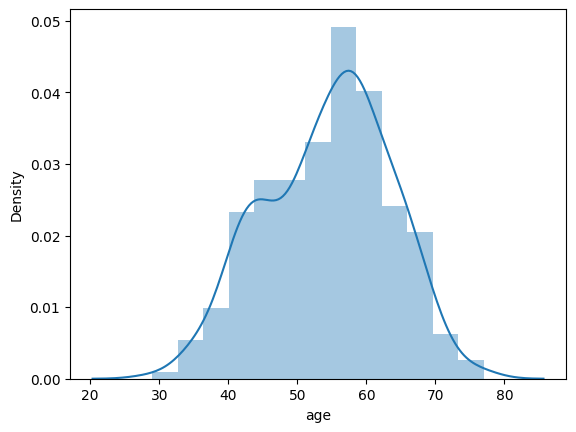

In [23]:
sns.distplot(HeartD['age'])

<AxesSubplot: >

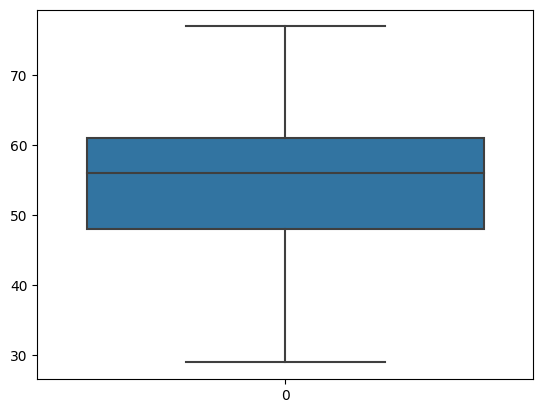

In [24]:
sns.boxplot(HeartD['age'])

In [25]:
HeartD['age'].describe()
#from below list we can see heart diesease patience range from age 29 to 77,
# among them age 56 to 77 are in major level .

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [31]:
from scipy.stats import skew 
from scipy.stats import kurtosis 
print(skew(HeartD['age']))
print(kurtosis(HeartD['age'])) 

#We notice -skewness and -ve kurtosis, may address less amount of accuracy due to insufficient data.
#We can expect skewed prediction majority of +prediction may happen around 56 to 61 age group.

-0.2080240895050745
-0.5345227201725988


In [32]:
print(HeartD)

#you can print entire data file

     age  gender  cp  trestbps  chol  fps  restecg  thalach  exang  oldpeak  \
0     63       1   1       145   233    1        2      150      0      2.3   
1     67       1   4       160   286    0        2      108      1      1.5   
2     67       1   4       120   229    0        2      129      1      2.6   
3     37       1   3       130   250    0        0      187      0      3.5   
4     41       0   2       130   204    0        2      172      0      1.4   
..   ...     ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45       1   1       110   264    0        0      132      0      1.2   
299   68       1   4       144   193    1        0      141      0      3.4   
300   57       1   4       130   131    0        0      115      1      1.2   
301   57       0   2       130   236    0        2      174      0      0.0   
302   38       1   3       138   175    0        0      173      0      0.0   

     slope ca thal  class  
0        3  0    6     

<AxesSubplot: xlabel='age', ylabel='thalach'>

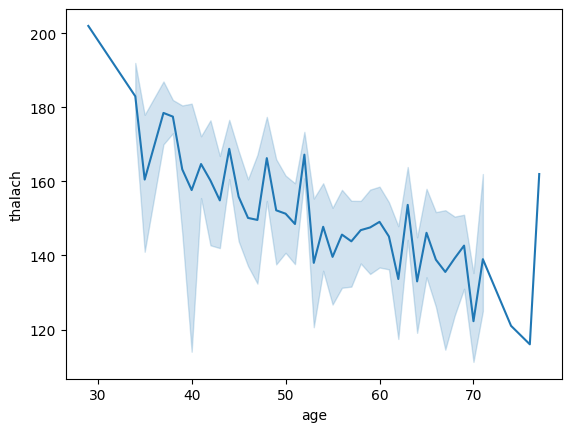

In [33]:
sns.lineplot(x = HeartD['age'], y = HeartD['thalach'])
#thalach means hear beat , we are checking the heart beat high and low for which age 

C:\Users\mouna\AppData\Local\Temp\ipykernel_16744\2207041087.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HeartD['thalach'])


<AxesSubplot: xlabel='thalach', ylabel='Density'>

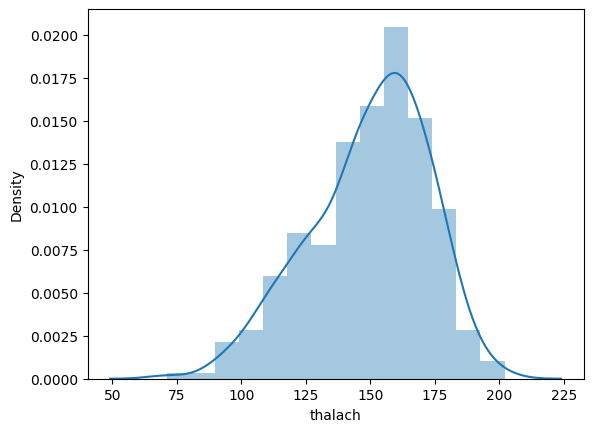

In [34]:
sns.distplot(HeartD['thalach'])
#graphic representation

In [35]:
HeartD['thalach'].describe()
# list 

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

<AxesSubplot: >

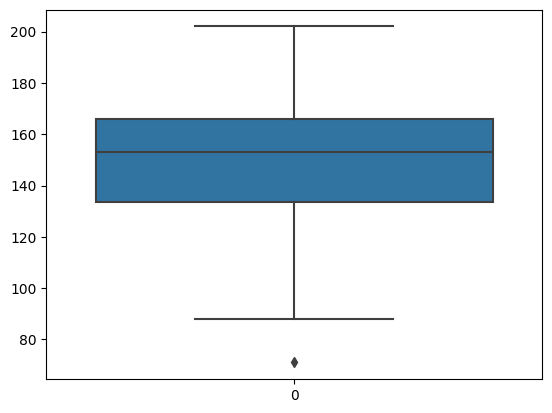

In [36]:
sns.boxplot(HeartD['thalach'])

<AxesSubplot: xlabel='age', ylabel='chol'>

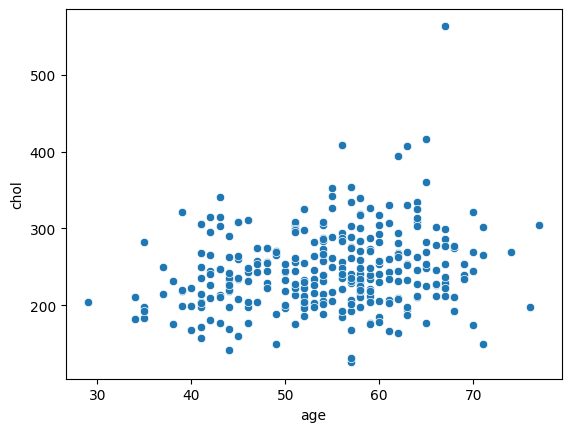

In [37]:
sns.scatterplot(x = HeartD['age'], y = HeartD['chol'])
#we can notice from scatterplot representation ,age between 56 to 70 have high chol level

<AxesSubplot: xlabel='age', ylabel='chol'>

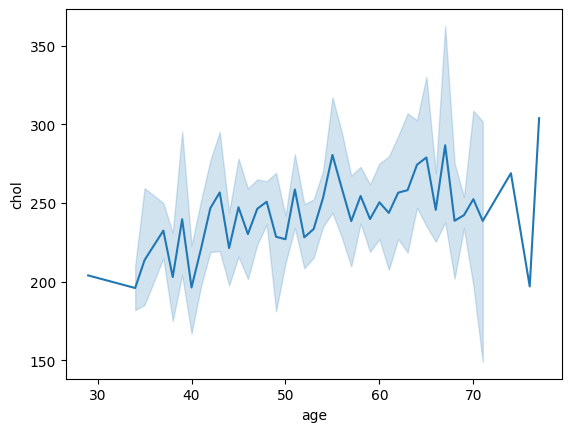

In [38]:
sns.lineplot(x = HeartD['age'], y = HeartD['chol'])

<AxesSubplot:xlabel='age', ylabel='trestbps'>

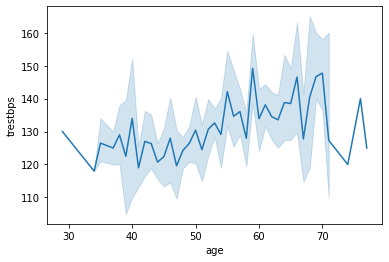

In [ ]:
sns.lineplot(x = HeartD['age'], y = HeartD['trestbps'])

<AxesSubplot: ylabel='count'>

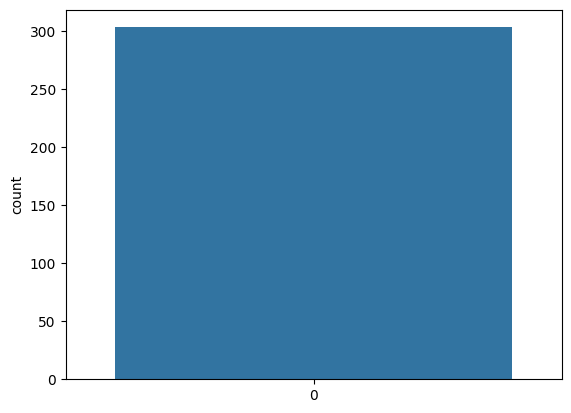

In [39]:
sns.countplot(HeartD['restecg'])

In [40]:
HeartD.dropna(axis=0)

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [41]:
HeartD = HeartD.replace('?', np.nan)


In [42]:
HeartD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [43]:
HeartD.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64

In [44]:
HeartD = HeartD.dropna()

In [45]:
HeartD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   gender    297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fps       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  class     297 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


In [46]:
HeartD['ca'].value_counts()

0    174
1     65
2     38
3     20
Name: ca, dtype: int64

In [47]:
HeartD['ca'] = pd.to_numeric(HeartD['ca'])

In [48]:
HeartD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   gender    297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fps       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    object 
 13  class     297 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 34.8+ KB


In [49]:
HeartD['thal'] = pd.to_numeric(HeartD['thal'])

In [50]:
HeartD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   gender    297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fps       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  class     297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB
